# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Predicción de la Retención de Empleados
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1u38Inu9eSZM02MlhLIzxY7aguGnzh17v)

![alt text](https://drive.google.com/uc?id=1UrsB2DV303p3F5-P96jZLKF_ZtLPIHg4)


![alt text](https://drive.google.com/uc?id=1DooMDDmd0ilm18AKFPfHar3SU0onyWwe)

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
# Debe incluir el enlace completo al archivo csv que contiene su conjunto de datos
employee_df = pd.read_csv("Human_Resources.csv")

In [270]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [271]:
employee_df.shape

(1470, 35)

In [272]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [273]:
(
employee_df
    .select_dtypes(include=['object'])
    .apply(pd.Series.nunique, axis = 0)
)

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [274]:
(
employee_df
    .select_dtypes(include=['int64'])
    .apply(pd.Series.nunique, axis = 0)
)
# remove columns 0 or low variance 
# remove columns with unique information by employee
# remove columns with high correlation with other columns (collinearity)

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [275]:
# missing values
employee_df.isna().sum().sum()
# apperently? is there any other way they added missing values?
 # apparently not

0

In [276]:
# duplicates
employee_df.duplicated().sum()
# nop

0

In [277]:
# outliers (distribtions)
describe_df = employee_df.describe()
# years at company and income seems the ones with outliers

In [278]:
# 35 características en total, cada una con 1470 puntos de datos

# TAREA #3: VISUALIZACIÓN DEL DATASET

In [279]:
# JobSatisfaction and EnvironmentSatisfaction?

# 1. ¿Cuál es el número de empleados que han abandonado la empresa?
# 2. ¿Cuál es el número de empleados que han abandonado la empresa por cada género?
# 3. ¿Cuál es el número de empleados que han abandonado la empresa por cada departamento?
# 4. ¿Cuál es el número de empleados que han abandonado la empresa por cada departamento y por cada género?

In [280]:
# Reemplazamos las columnas 'Attritition' y 'overtime' por enteros antes de poder llevar a cabo cualquier visualización
employee_df["Attrition"] = employee_df["Attrition"].replace({"Yes": 1, "No": 0})

In [281]:
# get percentages of attrition over overtime
(
employee_df
    .groupby(["Attrition","OverTime"])
    .size()
    .unstack()
    .apply(lambda x: x/x.sum(), axis=0)
)
# people who work overtime are more likely to leave the company (30% vs 10%)

OverTime,No,Yes
Attrition,,
0,0.895636,0.694712
1,0.104364,0.305288


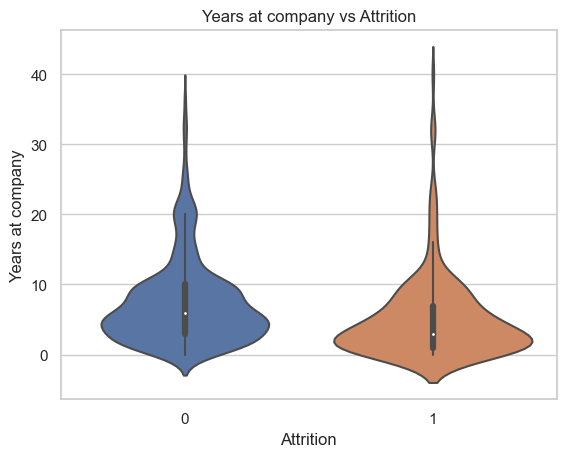

In [282]:
# plot working years vs attrition
sns.set(style="whitegrid")
sns.violinplot(x="Attrition", y="YearsAtCompany", data=employee_df)
plt.title("Years at company vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years at company")
plt.show()

In [283]:
# Veamos si nos faltan datos, ¡afortunadamente no es así!
employee_df.isna().sum().sum() 

0

c:\Users\jcr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\jcr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



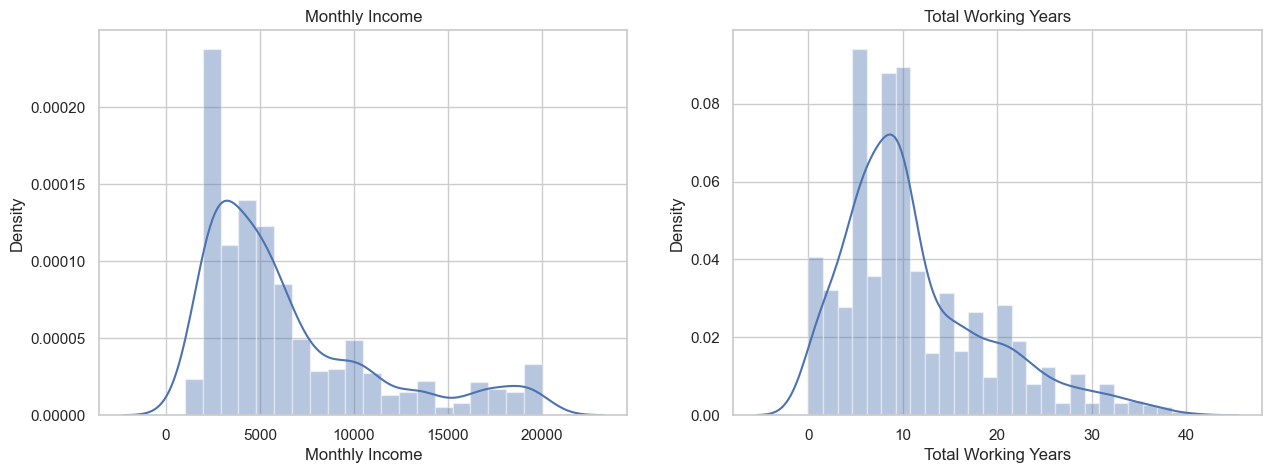

In [284]:
# Algunas características como 'MonthlyIncome' y 'TotalWorkingYears' tienen una distribución con una cola 
# muy larga (long tail distribution)
# Tiene sentido que nos desagamos de 'EmployeeCount' y 'Standardhours' ya que estos campos no cambian de 
# un empleado a otro
# plot a grid for two distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(employee_df["MonthlyIncome"], ax=axes[0])
sns.distplot(employee_df["TotalWorkingYears"], ax=axes[1])
# add titles to plot
axes[0].set_title("Monthly Income")
axes[1].set_title("Total Working Years")
# change label names
axes[0].set_xlabel("Monthly Income")
axes[1].set_xlabel("Total Working Years")
plt.show()

In [285]:
# Tiene sentido deshacerse de 'EmployeeCount' , 'Standardhours' y 'Over18' ya que son 
# campos que no cambian de un empleado a otro
# Eliminemos 'EmployeeNumber' también
employee_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis=1, inplace=True)

In [286]:
# Veamos cuantos empleados dejan la empresa!
employee_df["Attrition"].value_counts()
# Contamos el número de empleados que se quedaron y que se fueron
# Parece que estamos ante un conjunto de datos desequilibrado

0    1233
1     237
Name: Attrition, dtype: int64

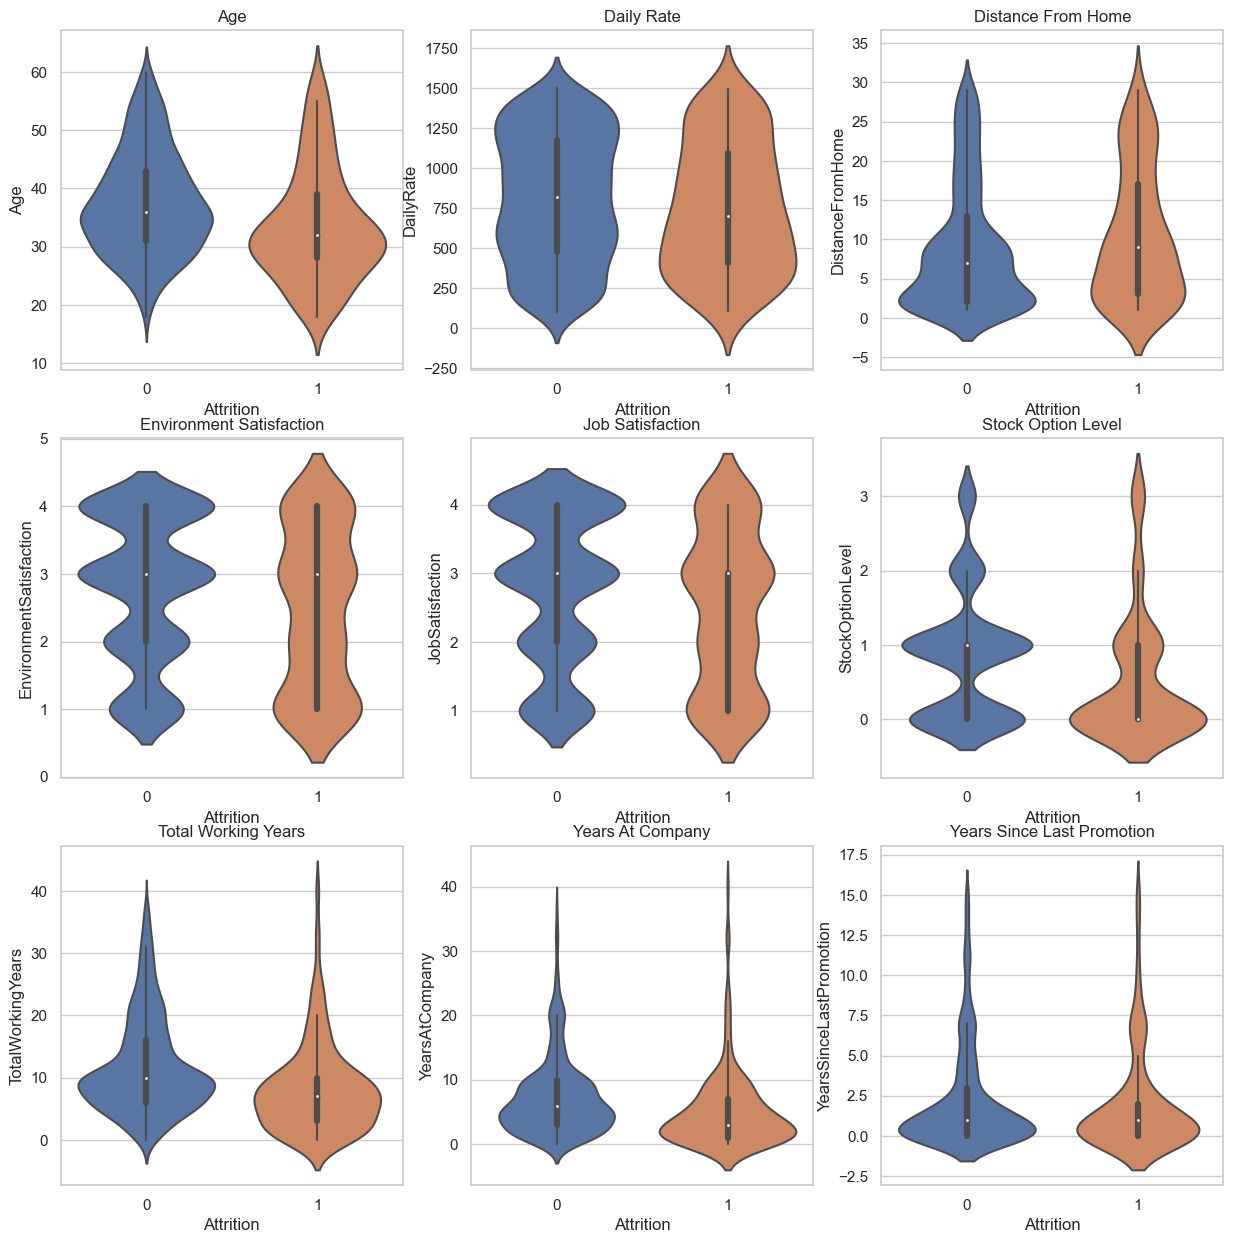

In [287]:
# Comparemos la media y el error estándar de los empleados que se quedaron y se fueron
# 'age': la edad media de los empleados que se quedaron es mayor en comparación con los que se fueron
# 'DailyRate': El rate diario de los empleados que se quedaron es mayor
# 'DistanceFromHome': Los empleados que se quedan viven más cerca del trabajo
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Los empleados que se quedan están en general más satisfechos con sus trabajos
# 'StockOptionLevel': Los empleados que se quedan tienen un mayor nivel de stocks options
# a grid plot with relation between attrition and mean and std
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
sns.violinplot(x="Attrition", y="Age", data=employee_df, ax=axes[0, 0])
sns.violinplot(x="Attrition", y="DailyRate", data=employee_df, ax=axes[0, 1])
sns.violinplot(x="Attrition", y="DistanceFromHome", data=employee_df, ax=axes[0, 2])
sns.violinplot(x="Attrition", y="EnvironmentSatisfaction", data=employee_df, ax=axes[1, 0])
sns.violinplot(x="Attrition", y="JobSatisfaction", data=employee_df, ax=axes[1, 1])
sns.violinplot(x="Attrition", y="StockOptionLevel", data=employee_df, ax=axes[1, 2])
sns.violinplot(x="Attrition", y="TotalWorkingYears", data=employee_df, ax=axes[2, 0])
sns.violinplot(x="Attrition", y="YearsAtCompany", data=employee_df, ax=axes[2, 1])
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", data=employee_df, ax=axes[2, 2])
# add titles to plot
axes[0, 0].set_title("Age")
axes[0, 1].set_title("Daily Rate")
axes[0, 2].set_title("Distance From Home")
axes[1, 0].set_title("Environment Satisfaction")
axes[1, 1].set_title("Job Satisfaction")
axes[1, 2].set_title("Stock Option Level")
axes[2, 0].set_title("Total Working Years")
axes[2, 1].set_title("Years At Company")
axes[2, 2].set_title("Years Since Last Promotion")
# change label names
axes[0, 0].set_xlabel("Attrition")
axes[0, 1].set_xlabel("Attrition")
axes[0, 2].set_xlabel("Attrition")
axes[1, 0].set_xlabel("Attrition")
axes[1, 1].set_xlabel("Attrition")
axes[1, 2].set_xlabel("Attrition")
axes[2, 0].set_xlabel("Attrition")
axes[2, 1].set_xlabel("Attrition")
axes[2, 2].set_xlabel("Attrition")
plt.show()

In [288]:

# Job level está altamente correlacionado con el número total de horas de trabajo
# Monthly income está altamente correlacionado con Job level
# Monthly income está altamente correlacionado con el número total de horas de trabajo
# Age está altamente correlacionado con los ingresos mensuales
# create a heatmap from a correlation 

dummies_df = pd.get_dummies(employee_df.select_dtypes(include=["object"]))
dummies_df = pd.concat([employee_df.select_dtypes(exclude=["object"]), dummies_df], axis=1)

corr = dummies_df.corr()

# import plotly
import plotly.graph_objs as go
# heatmap with plotly


fig = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.index.values,
        y=corr.columns.values,
        # add min and max value 1
        zmin=-1,
        zmax=1,
        xgap=1, ygap=1,
        colorscale='balance',
        colorbar=dict(
            title="Correlation",
            titleside="top",
            tickmode="array",
            tickvals=[-1, -0.5, 0, 0.5, 1],
            ticktext=["-1", "-0.5", "0", "0.5", "1"]
        )
        ))
# add all xlabels
fig.update_xaxes(side="top", tickangle=45)
# include all the xaxis and yaxis
fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals=list(range(len(corr.index.values))),
        ticktext=corr.index.values
    ),
    yaxis=dict(
        tickmode="array",
        tickvals=list(range(len(corr.columns.values))),
        ticktext=corr.columns.values
    )
)
# increase height of the plot
fig.update_layout(height=1000)

fig.update_layout(title="Correlation Heatmap", xaxis_nticks=36)
fig.show()

In [289]:
# Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
# Los representantes de ventas tienden a irse en comparación con cualquier otro trabajo
# Los empleados menos involucrados tienden a dejar la empresa
# Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa

In [290]:
# Veamos el Gender vs. Monthly Income
# get percentages of attrition over overtime
(
employee_df
    .groupby(["Attrition","Gender"])
    .size()
    .unstack()
    .apply(lambda x: x/x.sum(), axis=0)
)
# people who work overtime are more likely to leave the company (30% vs 10%)


Gender,Female,Male
Attrition,,
0,0.852041,0.829932
1,0.147959,0.170068


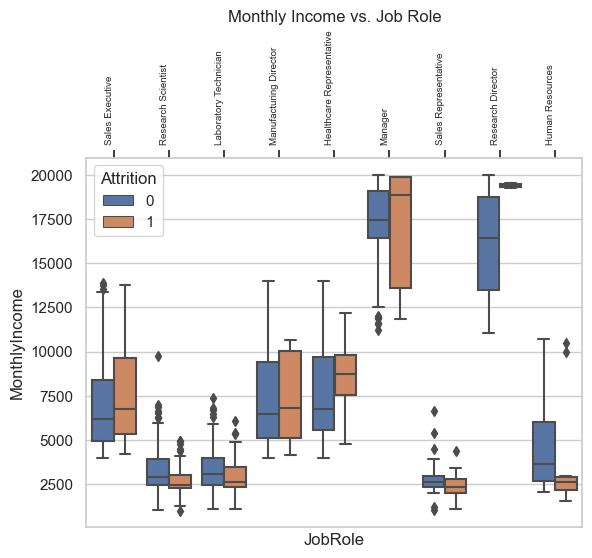

In [291]:
# Veamos el monthly income vs. job role
sns.boxplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=employee_df)


# x axis add on top
plt.gca().xaxis.tick_top()
plt.xticks(rotation=90, fontsize=7, fontweight="light", horizontalalignment="right", verticalalignment="bottom", position=(0, 1))
# 
plt.title("Monthly Income vs. Job Role")
plt.show()

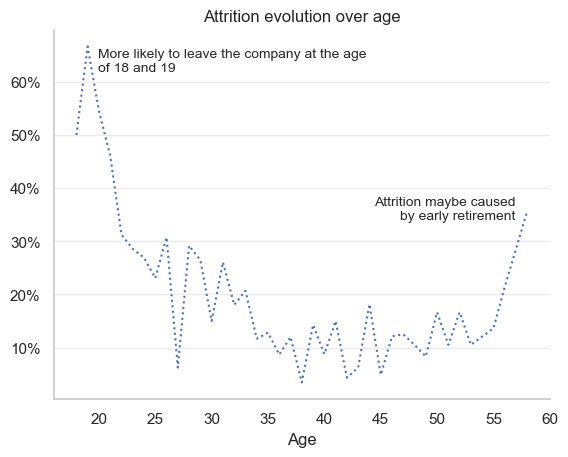

In [292]:
# stacked barplot attrition vs. age
# get percentages of attrition over overtime
from turtle import color


p_df = (
employee_df
    .groupby(["Attrition","Age"])
    .size()
    .unstack()
    .apply(lambda x: x/x.sum(), axis=0)
    .stack()
    .reset_index(name="Percentage")
    .query("Attrition == 1")
)

# import mtick
from matplotlib.ticker import PercentFormatter

# seaborn line blue dotted line
sns.lineplot(x="Age", y="Percentage", data=p_df, linestyle="dotted")
# change y lable to percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
# remove background lines from plot
sns.despine()
# add annotation to the plot top right corner
plt.annotate(
    "More likely to leave the company at the age\nof 18 and 19", 
    xy=(0.09, 0.95), 
    xycoords="axes fraction", 
    horizontalalignment="left",
    verticalalignment="top", 
    fontsize=10)

# add annotation to the plot top right corner
plt.annotate(
    "Attrition maybe caused\nby early retirement", 
    xy=(0.93, 0.55), 
    xycoords="axes fraction", 
    horizontalalignment="right",
    verticalalignment="top", 
    fontsize=10)
# remove only vertical grid lines
plt.grid(axis="y", which="major", color="#ECECEC")
plt.grid(axis="x", color="white")
plt.title("Attrition evolution over age")
# remove y label
plt.ylabel("")
plt.show()

# TAREA #4: CREAR LOS DATA SETS DE ENTRENAMIENTO Y TESTING Y LLEVAR A CABO LA LIMPIEZA DE DATOS

In [293]:
from sklearn.model_selection import train_test_split

X = employee_df.drop(["Attrition"], axis=1)
y = employee_df["Attrition"]

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# TAREA #5: ENTENDER LA TEORÍA DETRÁS DE LA REGRESIÓN LOGÍSTICA, REDES NEURONALES ALRTIFICIALES Y CLASIFICADORES DE BOSQUES ALEATORIOS

![alt text](https://drive.google.com/uc?id=1zC0o6mkPWhlIwbs1J2LXTVv1IjtTgBLw)

![alt text](https://drive.google.com/uc?id=1JahiZRxjM1gd1cdSlJXBsSmR3cCrZEwr)

![alt text](https://drive.google.com/uc?id=1Vf81FJgCX518kr8FFS-sgzT6Nu7yjMQA)

![alt text](https://drive.google.com/uc?id=11_L_2NlgtZJulG5BI6Lj8MMGpO5F_QJV)

![alt text](https://drive.google.com/uc?id=1azYXfWAiUl1LkzEJXYN-GRZneTfzMsVV)

# TAREA #6: ENTENDER COMO SE EVALUAN LOS MODELOS DE CLASIFICACIÓN

![alt text](https://drive.google.com/uc?id=1Mj1ZhIqcnJl1tfIHeq6R6T8LVzbodtqa)

![alt text](https://drive.google.com/uc?id=1095MBU9oYD1eE65fTrz-8sFgYbbvwAuH)

![alt text](https://drive.google.com/uc?id=1OojsDQecO-69GQFDYsULNhqgxAP9PrU3)

![alt text](https://drive.google.com/uc?id=1G1-il6xFMUuz3nd78kvwiP3mcuXqZM3U)

# TAREA #7: ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [336]:
cat_cols = X_train.select_dtypes(include=["object"]).columns
num_cols = X_train.select_dtypes(exclude=["object"]).columns

# import pipeline
from sklearn.pipeline import Pipeline
# import column transformer
from sklearn.compose import ColumnTransformer
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

# create a pipeline for numerical columns
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

# create a pipeline for categorical columns
cat_pipeline = Pipeline([
    ("one_hot_encoder", OneHotEncoder(drop="first"))
])

# create a column transformer
preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_cols),
    ("cat_pipeline", cat_pipeline, cat_cols)
])

# from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

# create a pipeline for logistic regression
log_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("log_reg", LogisticRegression())
])

# grid search
from sklearn.model_selection import GridSearchCV

# create a grid search
grid_search_lm = GridSearchCV(
    log_reg_pipeline,
    param_grid={
        "log_reg__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    },
    cv=5,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

# fit the grid search
grid_search_lm.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',...
      dtype='object')),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('one_hot_encoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)

In [337]:
# Resultados en el Conjunto de Testing
# import classification report
from sklearn.metrics import classification_report

# predict on test set
y_pred = grid_search_lm.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       255
           1       0.87      0.33      0.48        39

    accuracy                           0.90       294
   macro avg       0.89      0.66      0.71       294
weighted avg       0.90      0.90      0.89       294



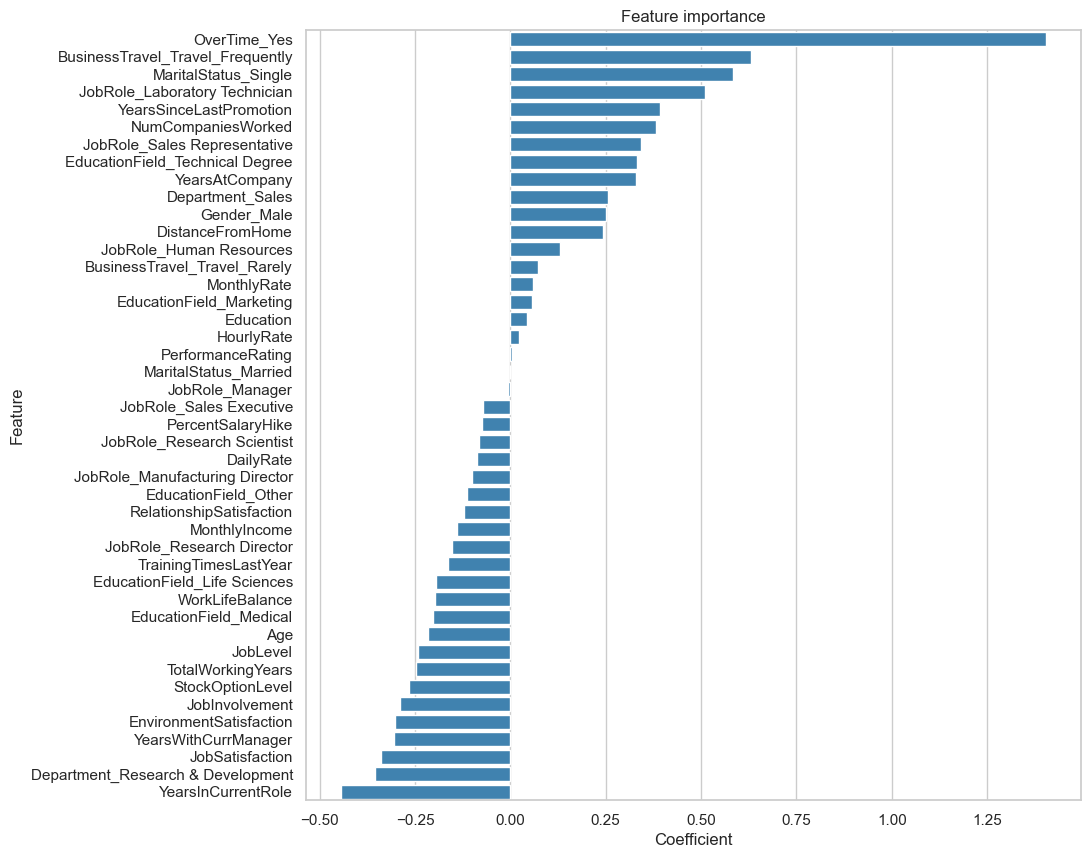

In [338]:
# get formual from logistic regression
# get the best estimator
best_estimator = grid_search_lm.best_estimator_

# get the preprocessor
preprocessor = best_estimator.named_steps["preprocessor"]

# get the one hot encoder
ohe_names = preprocessor.named_transformers_["cat_pipeline"].get_feature_names_out()

# get the feature names
feature_names = (
    list(num_cols) +
    list(ohe_names)
)

# get the coefficients
coefficients = best_estimator.named_steps["log_reg"].coef_[0]

# create a dataframe
coefficients_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# sort the dataframe by coefficient
coefficients_df = coefficients_df.sort_values(by="Coefficient", ascending=False)

# plot the coefficients
plt.figure(figsize=(10, 10))
sns.barplot(x="Coefficient", y="Feature", data=coefficients_df, color="#2E86C1")
plt.title("Feature importance")
plt.show()

# TAREA #8: ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [339]:
# import random forest
from sklearn.ensemble import RandomForestClassifier

# create a pipeline for random forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier())
])

# create a grid search
grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid={
        "rf__n_estimators": [100, 300],
        "rf__max_depth": [10, 15, 20],
        "rf__min_samples_split": [8, 10, 12],
        "rf__min_samples_leaf": [5, 7, 9],
    },
    cv=5,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

# fit the grid search
grid_search_rf.fit(X_train, y_train)

# predict on test set
y_pred = grid_search_rf.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



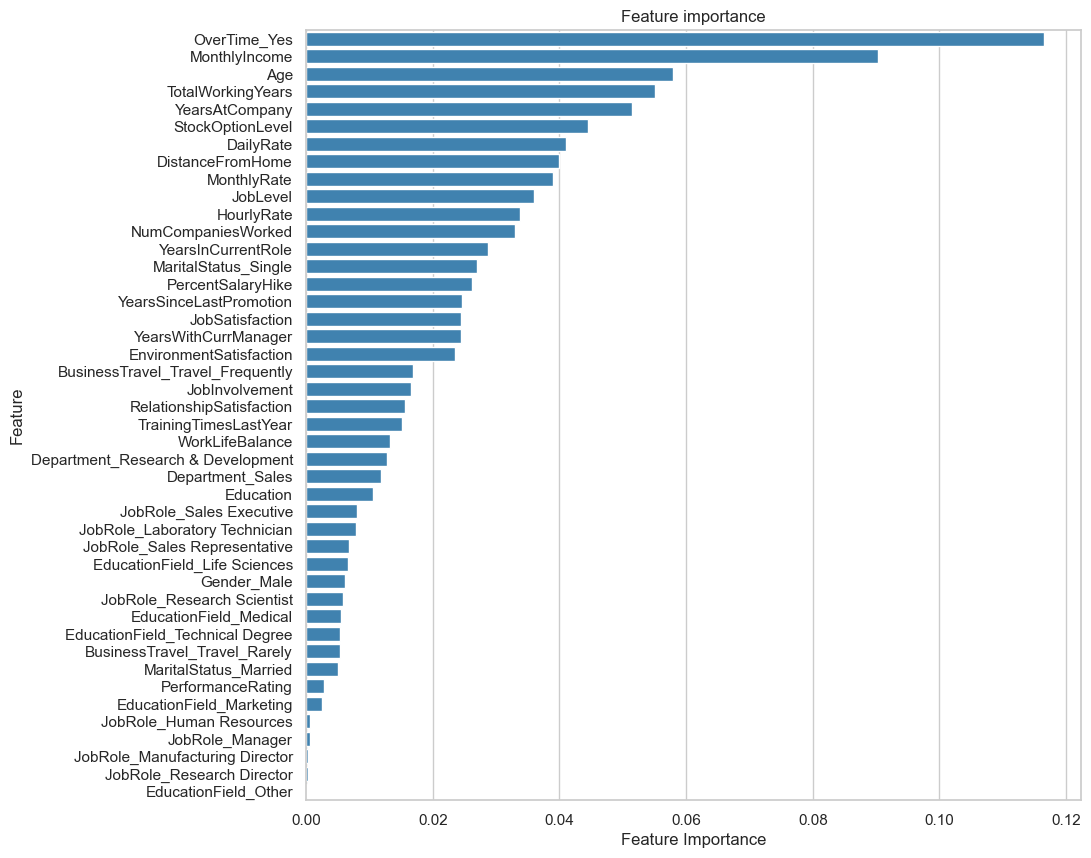

In [340]:
# get importance from random forest
# get the best estimator
best_estimator = grid_search_rf.best_estimator_

# get the preprocessor
preprocessor = best_estimator.named_steps["preprocessor"]

# get the one hot encoder
ohe_names = preprocessor.named_transformers_["cat_pipeline"].get_feature_names_out()

# get the feature names
feature_names = (
    list(num_cols) +
    list(ohe_names)
)

# get the feature importance
feature_importance = best_estimator.named_steps["rf"].feature_importances_

# create a dataframe
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Feature Importance": feature_importance
})

# sort the dataframe by feature importance
feature_importance_df = feature_importance_df.sort_values(by="Feature Importance", ascending=False)

# plot the feature importance
plt.figure(figsize=(10, 10))
sns.barplot(x="Feature Importance", y="Feature", data=feature_importance_df, color="#2E86C1")
plt.title("Feature importance")
plt.show()

# TAREA #8: ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)


In [ ]:
# Resultados en el Conjunto de Testing



# ¡EXCELENTE TRABAJO! USTED DEBE ESTAR ORGULLOSO DE SUS HABILIDADES RECIEN ADQUIRIDAS